In this notebook we give a way to compute a matrix of $Q$, for the bilinear form introduced in *On a quadratic form associated to the nilpotent part of the monodromy of a  curve* by L. Alanis, E. Artal, C. Bonatti, X. Gómez-Mont, M. González Villa and, P. Portilla. We treat here Example 4.6 in the paper.

The input is the germ of the plane curve singularity given by $f_{a,b}(x,y)=((y^2-x^3)^2-x^{b+6}-4yx^{(b+9)/2})((x^2-y^5)^2-y^{a+10}-4xy^{(a+15)/2})$, $a=2\alpha+1$, $b=2\beta+1$. It is introduced via the adjacency matrix $A$ of the dual graph of the minimal dual resolution.
The yellow vertices are the arrows of the graph. We color the vertices that *survive* in the dual graph of the semistable normalization. We introduce manually the position of the vertices to have a better plot. 
<!--Though it is an unoriented graph, we consider the edges oriented lexicographic, except the arrows, where the arrow-head is the end point. The arrows in this example are the first and the last edges, to keep the symmetry.-->

In [1]:
def plotsubgraph(lista,NS,NScolor):
    lista1=[i.abs().str() for i in lista]
    aristas=[u for u in NS.edges() if u[2] in lista1]
    vrt1=[(u[0],u[1]) for u in aristas]
    vrt=list(Set(flatten(vrt1)))
    H=NS.subgraph(edges=aristas, algorithm='delete')
    return H.plot(edge_labels=True,vertex_colors=NScolor)


def vct(m,lista):
    V=ZZ^m
    v=V(0)
    for i in lista:
        if i>0:
            v+=V.gen(i-1)
        if i<0:
            v=v-V.gen(-i-1)
    return v

def Qform(alpha,beta,dibujos=False):
    nres=12+alpha+beta
    A=Matrix(nres)
    for j in [0..4+alpha+beta]:
        A[j,j+1]=1
    A[0,6+alpha+beta]=A[alpha+1,7+alpha+beta]=A[alpha+4,8+alpha+beta]=A[5+alpha+beta,9+alpha+beta]=1
    A[0,10+alpha+beta]=A[5+alpha+beta,11+alpha+beta]=1
    A=A+A.transpose()
    G=Graph(A)
    if dibujos:
        Gv={j:(2*j,0) for j in [0..5+alpha+beta]}
        Gv[10+alpha+beta]=(-2,0)
        Gv[6+alpha+beta]=(0,2)
        Gv[7+alpha+beta]=(2*(alpha+1),2)
        Gv[8+alpha+beta]=(2*(alpha+4),2)
        Gv[9+alpha+beta]=(2*(5+alpha+beta),2)
        Gv[11+alpha+beta]=(2*(6+alpha+beta),0)
        G.set_pos(Gv)
        Gcolor={'yellow':[10+alpha+beta,11+alpha+beta],'white':[1..alpha]+[alpha+2,alpha+3]+[alpha+5..5+alpha+beta]+[6+alpha+beta..9+alpha+beta], 'green': [0], 'blue':[alpha+1], 'magenta': [alpha+4], 'turquoise' : [5+alpha+beta]}
        show(G.plot(vertex_colors=Gcolor,figsize=10))
    Vmult=[58+4*alpha]+[28+2*alpha,26+2*alpha..28]+[12,8]+[20,22..20+2*beta]+[42+4*beta,29+2*alpha,14,10,21+2*beta,1,1]
    if dibujos:
        print(Vmult)
    A1=copy(A)
    for i in range(nres):
        A1[i,i]=Vmult[i]
    Bamboos={1:(10+alpha+beta,0),2:tuple([0..alpha+1]),3:tuple([alpha+1,..,alpha+4]),4:tuple([alpha+4,..,5+alpha+beta]), 5:(5+alpha+beta,11+alpha+beta)}
    e=lcm([58+4*alpha,28,20,42+4*beta])
    if dibujos:
        for j in Bamboos.keys():
            b=Bamboos[j]
            u=len(b)
            for k in range(u-1):
                G.set_edge_label(b[k],b[k+1],j.str())
        Gbamboos=G.plot(edge_labels=True,vertex_colors=Gcolor,figsize=10)
        show(Gbamboos)
    ScrewNumber={}
    for j in Bamboos.keys():
        b=Bamboos[j]
        d=gcd([Vmult[i] for i in b])
        #print(d)
        l=len(b)
        a=sum([1/Vmult[b[i]]/Vmult[b[i+1]] for i in (0..l-2)])
        ScrewNumber[j]=e*a*d
    if dibujos:
        for j in Bamboos.keys():
            b=Bamboos[j]
            u=len(b)
            for k in range(u-1):
                G.set_edge_label(b[k],b[k+1],'('+j.str()+','+ScrewNumber[j].str()+')')
        GbamboosSN=G.plot(edge_labels=True,vertex_colors=Gcolor,figsize=15)
        show(GbamboosSN)
    L0=[(0,1),(0,2),(0,6),(1,3),(1,3),(2,4),(2,4),(3,5),(4,5),(5,7)]
    m=len(L0)
    if dibujos:
        L=[]
        j=0
        for u in [1..m]:
            a,b=L0[u-1]
            j+=1
            L.append((a,b,j.str()))
        NS=Graph(L,multiedges=True)
        NSv={0:(0,0), 1:(2,1), 2:(3,-1), 3:(7,1), 4:(6,-1), 5:(9,0), 6: (-2,0), 7: (11,0)}
        NS.set_pos(NSv)
        NScolor={'yellow': [6,7], 'green': [0], 'blue': [1,2], 'magenta': [3,4], 'turquoise': [5]}
        NSplot=NS.plot(edge_labels=True,vertex_colors=NScolor)
        show(NSplot)
        show(Gbamboos)
    Edges2Bamboos={1:2, 2:2, 3:1, 10:5}
    for i in [4..7]:
        Edges2Bamboos[i]=3
    for i in [8,9]:
        Edges2Bamboos[i]=4
    D=vector([ScrewNumber[Edges2Bamboos[i]] for i in [1..m]])
    QE=diagonal_matrix(D)
    Base=[(4,-5),(1,5,8,-9,-6,-2),(6,-7),(-3,1,4,8,10)]
    if dibujos:
        for u in Base:
            print(u)
            show(plotsubgraph(u,NS,NScolor))
            print("\n")
    V=ZZ^m
    Q=Matrix(len(Base),lambda i,j:vct(m,Base[i])*QE*vct(m,Base[j]))
    return (Q)

In [2]:
Qform(0,5)==Qform(1,4)

True

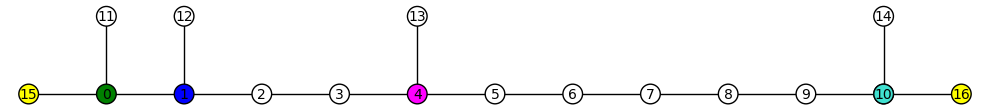

[58, 28, 12, 8, 20, 22, 24, 26, 28, 30, 62, 29, 14, 10, 31, 1, 1]


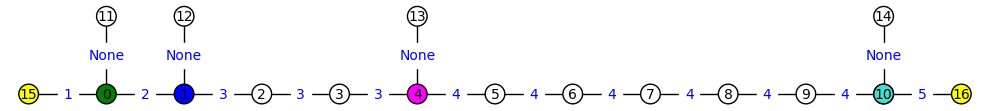

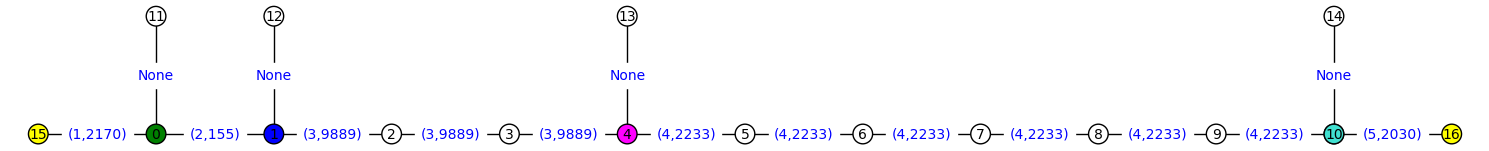

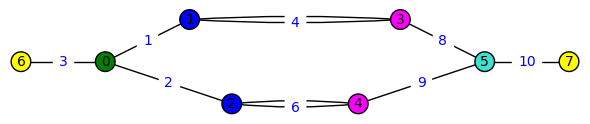

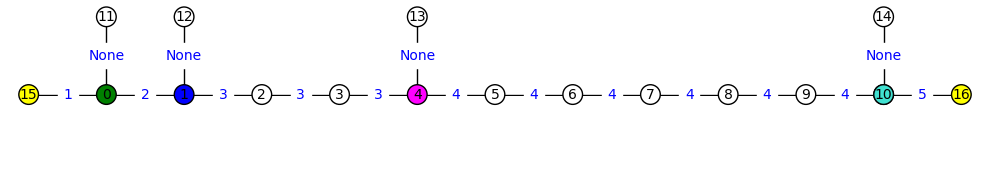

(4, -5)


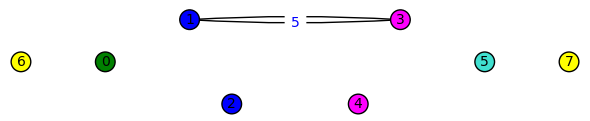



(1, 5, 8, -9, -6, -2)


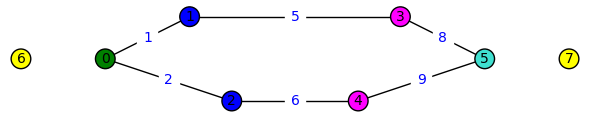



(6, -7)


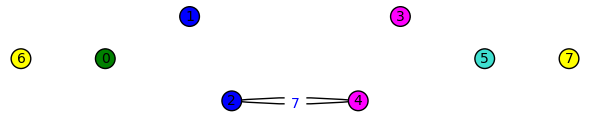



(-3, 1, 4, 8, 10)


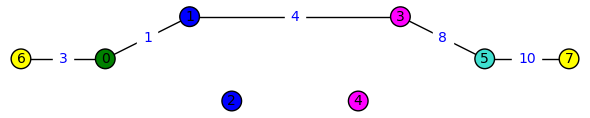

[19778 -9889     0  9889]
[-9889 24554 -9889  2388]
[    0 -9889 19778     0]
[ 9889  2388     0 16477]

In [3]:
Qform(0,5,dibujos=True)